# **Introduction**

1. The solution to both questions 1 and 2 are in this notebook.
2. The solutions were solved separately before combining. These individual notebooks can be found by following these links: [Q1 - Unexpected Plots](https://colab.research.google.com/drive/12W8087d64uPze3JJh12Us_5JGlcINrKA?usp=sharing)  /  [Q2 - Panda and Movie Data](https://colab.research.google.com/drive/19b2QAIjg92AeM0p4QESdd8g67JGiVKrB?usp=sharing)
3. The repository for tracking progress is in [github](https://github.com/obengdouglas/DSI-2022). Visibility is public.
4. The imdb files used to answer question 2 were read from the github repo as above, specifically [imdb_files folder](https://github.com/obengdouglas/DSI-2022/tree/main/imdb_files)

#**Question 1: Unexpected Plots (Hexagon)**

**Notes**

Write a python function that will plot the points that come from the following procedure: 

1. Create a regular hexagon
2. Pick a random point, P, inside the hexagon. 
3. Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
4. Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 
5. Make a scatter plot of all your 10,000 random points. What emerges? 

The goal of this exercise is to ensure that you have enough basic skills and familiarity with python to succeed.

[url to document](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit)

# Libraries

In [32]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import math
from math import sqrt
import random
import time

# Complete Code 

Coordinates of hexagon are [(1, 0), (0.5, 0.8660254037844386), (-0.5, 0.8660254037844386), (-1, 0), (-0.5, -0.8660254037844386), (0.5, -0.8660254037844386), (1, 0)]
The time of execution of above program is : 253.73786902427673


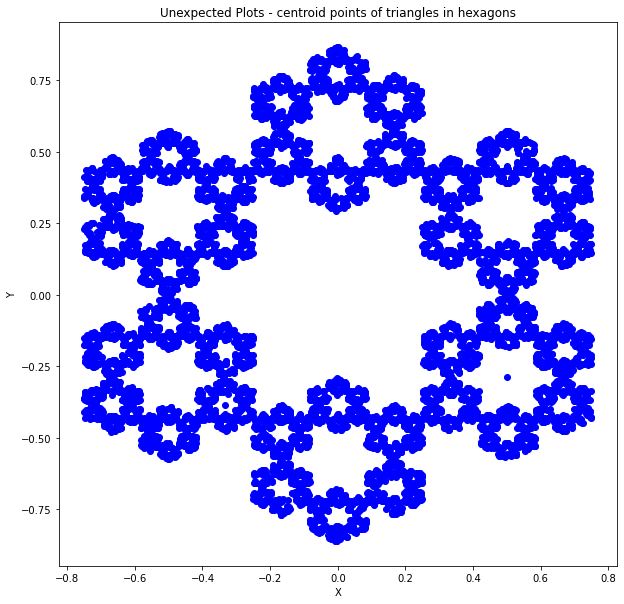

In [33]:
# 1.1. Create Regular hexagon 
start = time.time()
# Put coordinates of a regular hexagon in a dictionary. 
# A - F are the coordinates of a regular polygon with length of 'a' and center 0,0. (https://qr.ae/pG6IHm). 

a=1
coordinates = {'A':(a,0), 'B':(a/2,(a/2)*sqrt(3)), 'C':(-a/2,(a/2)*sqrt(3)), 'D':(-a,0), 'E':(-a/2,(-a/2)*sqrt(3)), 'F':(a/2,(-a/2)*sqrt(3))} 
hexagon=[coordinates[x] for x in coordinates]
hexagon.append(hexagon[0]) # Append coordinates of hexagon. Argument refers to index of last/ending coordinates (ie. coordinates A. )
xh, yh = zip(*hexagon) # Create lists of x and y values for hexagon

centroid = (0,0) # Define centroid with dummy coordinates. 
print('Coordinates of hexagon are', hexagon)

#1.2-1.4. Put creation of triangles and centroids in a loop
# The 3 coordinates used for a triangle are: 1. centroid . 2. random coordinate selected from A -F. 3. coordinate adjacent to randomly selected coordinate (in forward direction)

runs = 10000
for a in range(runs):
  adjacent = ['A', 'B', 'C', 'D', 'E', 'F', 'A'] #Ending at A ensures F has a forward adjacent coordinate
  
  n_pairs = 1
  for b in range(n_pairs):
    i = random.randrange(len(adjacent)-1)
    randpoints = [adjacent[i], adjacent[i+1]]
    triangle=[coordinates[x] for x in randpoints]
    triangle.insert(0, centroid)
    
    trianglecopy=triangle.copy()

    triangle.append(triangle[0]) #close triangle
    xt, yt = zip(*triangle)

    xx = []
    for x in trianglecopy:
      xx.append(x[0])
    x1, x2, x3 = xx # where x1, x2, x3 refer to x coordinates of triangle

    yy = []
    for y in trianglecopy:
      yy.append(y[1])
    y1, y2, y3 = yy # where y1, y2, y3 refer to y coordinates of triangle


    xc = ((x1 + x2 + x3) / 3)
    yc = ((y1 + y2 + y3) / 3)
    #print('centroid',(a),':', centroid) #uncomment to print coordinates of centroids
    #print('triangle coordinates are',(a),':', trianglecopy) #uncomment to print coordinates of triangles. First x,y coordinates refers to centroid.
    centroid = (xc, yc)
    
    ## Uncomment below to show plot of triangles
    # plot1=plt.figure(1)
    # plt.ion()
    # plt.rcParams['figure.figsize'] = [10, 10]
    # plt.title("Unexpected Plots - triangles in hexagons")
    # plt.xlabel("X")
    # plt.ylabel("Y")
    # plt.plot(xt, yt, color='green')

    #5. Plot centroid points NB: Initial random point not printed
    plot1=plt.figure(2)
    plt.ion()
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.title("Unexpected Plots - centroid points of triangles in hexagons")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(xc, yc, color='blue')

#plt.plot(xh, yh, color='red') # uncomment to show hexagon around centroid points

end = time.time()
print("The time of execution of above program is :", end-start)

# Consider the following changes/improvements
# 1. Generate hexagon without need for coordinates. Can process be done using turtle?
# 2. Make selection of first random internal point (centroid) truelly automatic/random. Current method is random but manual
# 3. Improve runtime
# 4. Include initial random point in plot without omitting last centroid point
# 5. Plot size occasionally different from specified dimensions.

#**Question 2: Datascience with Pandas and Movie Data**

**Notes**

Pandas, jupyter notebooks and colab are some of the most basic python tools in data science. Here we want to make sure you know how to load data into pandas, manipulate columns, rows and subsets of dataframes, perform string manipulation, regex, merging of dataframes, groupby, sorting of values, as well as know how to perform basic statistics on dataframes.

We also want you to be familiar with installing python packages, reading documentation and have a little familiarity with key libraries like scipy, sklearn and pytorch. 

Finally we also want you to show that you understand the basics of git, which is an industry standard. 


[url to document](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit)

# Libraries and Files


In [34]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns
import sklearn
import scipy
import torch
import torch.nn as nn
import torch.optim as optim


In [35]:
#1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.

url_akas='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/imdb_files/title.akas.tsv.gz'
url_basics='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/imdb_files/title.basics.tsv.gz'
url_ratings='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/imdb_files/title.ratings.tsv.gz'

df_akas = pd.read_csv(url_akas, compression='gzip', sep='\t', quotechar='"', error_bad_lines=False)
df_basics = pd.read_csv(url_basics, compression='gzip', sep='\t', quotechar='"', error_bad_lines=False)
df_ratings = pd.read_csv(url_ratings, compression='gzip', sep='\t', quotechar='"', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df_akas.describe()
df_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [37]:
df_akas_2 = df_akas.rename(columns={'titleId': 'tconst'})
df_akas_2.head(10)


,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0


In [38]:
df_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [39]:
df_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
5,tt0000006,5.5,88
6,tt0000007,5.5,573
7,tt0000008,5.6,1526
8,tt0000009,5.5,70
9,tt0000010,6.9,5083


# Data Manipulation 1 

Drop duplicates, marge, unique, isin, add column, lower case, copy

In [40]:
#2. Drop duplicates in all the dataframes, if there are any. 

df_akas_2.drop_duplicates()
df_basics.drop_duplicates()
df_ratings.drop_duplicates()


,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
...,...,...,...
874198,tt9100972,7.0,5
874199,tt9104810,7.0,7
874200,tt9106766,7.6,5
874201,tt9107292,8.4,10


In [41]:
#3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe. 

imdb_list = [df_akas_2, df_basics, df_ratings]
imdb_merge = reduce(lambda left,right: pd.merge(left,right,on='tconst'), imdb_list)
imdb_merge

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5
1686543,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686544,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686545,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5


In [42]:
imdb_outer = reduce(lambda left,right: pd.merge(left,right, how='outer', on='tconst'), imdb_list)
imdb_outer

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
1,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
2,tt0000001,3.0,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
3,tt0000001,4.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
4,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740084,tt9120652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #18.93,Episode #18.93,0.0,\N,\N,\N,"Comedy,Drama,Family",NaN,NaN
6740085,tt9120654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #18.95,Episode #18.95,0.0,\N,\N,\N,"Comedy,Drama,Family",NaN,NaN
6740086,tt9120656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Upon Arrival,Upon Arrival,0.0,2018,\N,10,"Horror,Short",NaN,NaN
6740087,tt9120782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,videoGame,UEFA Euro 96 England,UEFA Euro 96 England,0.0,1995,\N,\N,\N,NaN,NaN


In [43]:
imdb_left = reduce(lambda left,right: pd.merge(left,right, how='left', on='tconst'), imdb_list)
imdb_left

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423655,tt9118622,2,Bundesliga Stars 2001,DE,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423656,tt9118622,3,The F.A. Premier League Stars 2001,\N,\N,original,\N,1,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423657,tt9118622,4,LNF Stars 2001,FR,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423658,tt9118622,5,K-League Stars 2001,KR,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN


In [44]:
imdb_right = reduce(lambda left,right: pd.merge(left,right, how='right', on='tconst'), imdb_list)
imdb_right

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3.0,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975951,tt9100972,2.0,Когда Медвежонок проснется,SUHH,ru,\N,\N,0,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5
1975952,tt9104810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Blue,Blue,0,2018,\N,12,"Fantasy,Short",7.0,7
1975953,tt9106766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,video,Hans Teeuwen: Echte rancune,Hans Teeuwen: Echte rancune,0,2018,\N,63,"Comedy,Documentary",7.6,5
1975954,tt9107292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Kristen Bell,Kristen Bell,0,2018,\N,\N,Talk-Show,8.4,10


In [45]:
imdb_inner = reduce(lambda left,right: pd.merge(left,right, how='inner', on='tconst'), imdb_list)
imdb_inner

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5
1686543,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686544,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686545,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5


In [46]:
#3.1 How many lines does the resulting dataframe have if you use an inner merge or outer merge? Make sure you understand the difference.
# Ref: https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/

print('Number of lines with outer merge:', len(imdb_outer.index))
print('Number of lines with inner merge:', len(imdb_inner.index), '(This is the default merge)')

Number of lines with outer merge: 6740089
Number of lines with inner merge: 1686547 (This is the default merge)


In [47]:
# 3.2 Using the unique() method, compute how many different 'titleTypes' there are
# list of different titleTypes

imdb_inner.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [48]:
# 3.2 Using the unique() method, compute how many different 'titleTypes' there are
# number of different titleTypes

imdb_inner.titleType.nunique()

10

In [49]:
# 4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') 
# AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new.

df_new0 = imdb_inner[imdb_inner["language"].isin(['en', 'us'])]
df_new = df_new0[df_new0["titleType"].isin(['movie'])]
df_new

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686420,tt9020894,2,Temporary Difficulties,XWW,en,imdbDisplay,\N,0,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20
1686485,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9
1686494,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17
1686520,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213


In [50]:
# 5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column. 

df_new=df_new.copy()
df_new['log10Votes'] = np.log10(df_new['numVotes'])
df_new

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20,1.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686420,tt9020894,2,Temporary Difficulties,XWW,en,imdbDisplay,\N,0,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20,1.301030
1686485,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9,0.954243
1686494,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17,1.230449
1686520,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213,2.328380


In [51]:
#6. Lower the case of all text in the 'genres' column.

df_new['genres']=df_new['genres'].str.lower()
df_new.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\n,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"drama,romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,drama,6.0,20,1.301030


# Data Manipulation 2
Groupby, Scatter plot

In [52]:
# 6. Using Groupby (or other technique), 
#     6.1 group all data by 'genres' and display the top 10 highest genres by:
#     6.2 mean number of log10Votes
#     6.3 mean averageRating

In [53]:
# 6.1 group all data by 'genres'
df_new_genres=df_new.groupby('genres')
df_new_genres.first()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,log10Votes
genres,,,,,,,,,,,,,,,,,,
\n,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,5.9,7,0.845098
action,tt0034147,2,The Eagle of the Steppe,XWW,en,\N,informal literal title,0,movie,Salavat Yulayev,Salavat Yulayev,0,1940,\N,\N,7.1,18,1.255273
"action,adult,comedy",tt0183256,1,La Blue Girl Live 2: Birth of the Demon Child,CA,en,imdbDisplay,\N,0,movie,La Blue Girl Live 2: Birth of the Demon Child,Injû gakuen 2: Mashô no hime tanjô jissha hen,1,1996,\N,\N,5.4,97,1.986772
"action,adult,crime",tt0179274,1,Thou Shalt Love Human Beings,XWW,en,\N,informal English title,0,movie,Insanlari seveceksin,Insanlari seveceksin,1,1979,\N,79,5.5,58,1.763428
"action,adventure",tt0012484,1,The Murder of General Gryaznov,XWW,en,\N,\N,0,movie,The Murder of General Gryaznov,Arsena Jorjiashvili,0,1921,\N,50,5.5,22,1.342423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"thriller,war",tt0031968,19,U-boat 29,NZ,en,\N,promotional title,0,movie,The Spy in Black,The Spy in Black,0,1939,\N,82,7.0,1579,3.198382
"thriller,western",tt0044953,6,The Naked Spur,CA,en,imdbDisplay,\N,0,movie,The Naked Spur,The Naked Spur,0,1953,\N,91,7.4,8781,3.943544
war,tt0033417,9,Courage,XWW,en,\N,literal title,0,movie,Boyevoy kinosbornik 3,Boyevoy kinosbornik 3,0,1941,\N,\N,6.7,16,1.204120


In [54]:
# display the top 10 highest genres by:
#     6.2 mean number of log10Votes

df_new_genres.agg({'log10Votes' : 'mean', 'averageRating' : 'mean'}).sort_values("log10Votes", ascending=False).head(10)

,log10Votes,averageRating
genres,,
"adventure,sci-fi,thriller",5.803146,7.475000
"mystery,romance,sci-fi",5.641197,7.500000
"adventure,comedy,music",5.200092,6.400000
"film-noir,mystery,thriller",5.138634,8.200000
"film-noir,mystery",5.133127,8.100000
"action,adventure,thriller",4.532179,6.407143
"action,thriller,war",4.500103,6.885714
"horror,musical,sci-fi",4.340484,6.700000
"action,sci-fi,sport",4.296819,6.600000


In [55]:
# display the top 10 highest genres by:
#     6.3 mean averageRating

df_new_genres.agg({'log10Votes' : 'mean', 'averageRating' : 'mean'}).sort_values("averageRating", ascending=False).head(10)

,log10Votes,averageRating
genres,,
"drama,history,news",0.698970,9.20
"documentary,fantasy",1.050185,9.15
"documentary,family,music",1.113943,8.90
"animation,crime,documentary",1.431364,8.70
"crime,documentary,thriller",1.593285,8.50
"action,adventure,musical",1.633468,8.50
"documentary,drama,thriller",1.135400,8.50
"adventure,documentary,sport",2.283954,8.50
"biography,documentary,musical",1.431364,8.40


In [56]:
# 7.1 Using ‘groupby’ group all data by averageRating and 
# 7.2 make a scatter plot of averageRating vs log10Votes.

df_new_averageRating = pd.DataFrame(df_new.groupby(['averageRating'])['log10Votes'].mean())
df_new_averageRating = df_new_averageRating.reset_index()
df_new_averageRating


# Ref: df = pd.DataFrame(old_df.groupby(['groupby_attribute'])['mean_attribute'].mean())
# df = df.reset_index()

,averageRating,log10Votes
0,1.0,2.457534
1,1.1,2.135496
2,1.2,2.112159
3,1.3,1.847590
4,1.4,1.701375
...,...,...
83,9.3,1.768129
84,9.4,1.785517
85,9.5,1.363224
86,9.6,1.567416


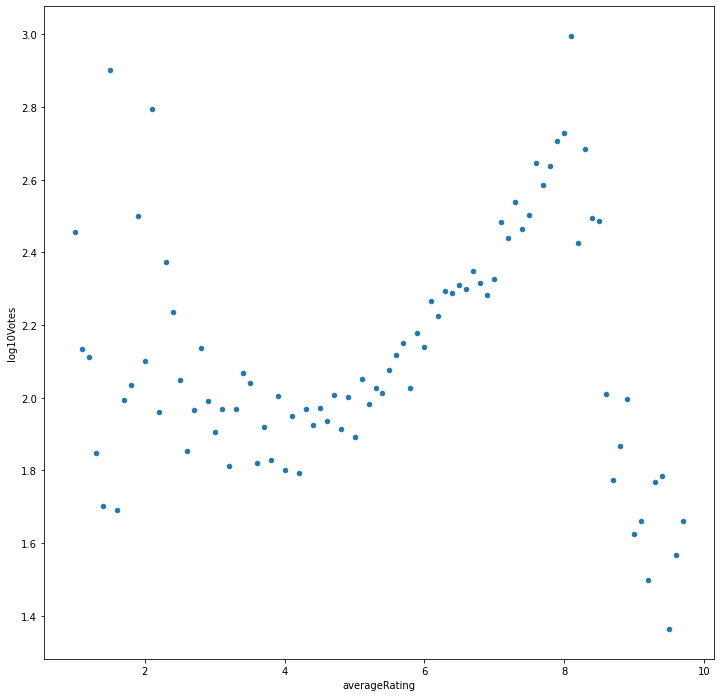

In [57]:
# 7.2 

fig, ax = plt.subplots(figsize=(12,12))
df_new_averageRating.plot(kind='scatter', x = "averageRating", y = "log10Votes", ax=ax)

# Linear Regressions
sklearn, scipy, pytorch

In [58]:
# 8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

#     8.1 Using sklearn 
#     8.2 Using scipy 
#     8.3 Using pytorch 

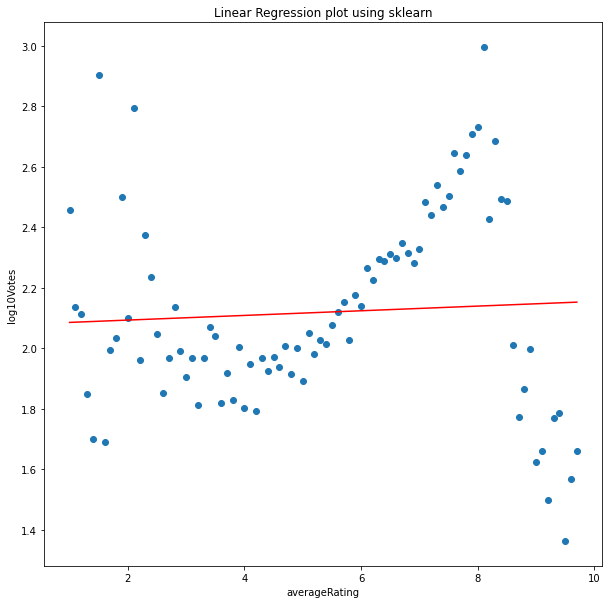

The equation of the linear regression line using sklearn is:
y =  0.007691496810815309x + 2.0778175106163106


In [59]:
#     8.1 Using sklearn

from sklearn import linear_model
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.array(df_new_averageRating['averageRating']).reshape(-1, 1)
y = np.array(df_new_averageRating['log10Votes']).reshape(-1, 1)

reg = LinearRegression()
reg = reg.fit(x, y)
reg.score(x, y)
coef_=reg.coef_
intercept_=reg.intercept_

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, reg.predict(x), 'r')
plt.xlabel('averageRating')
plt.ylabel('log10Votes')
plt.title('Linear Regression plot using sklearn')
plt.show()

print('The equation of the linear regression line using sklearn is:')
print('y = ', str(float(coef_)) + 'x +', float(intercept_))

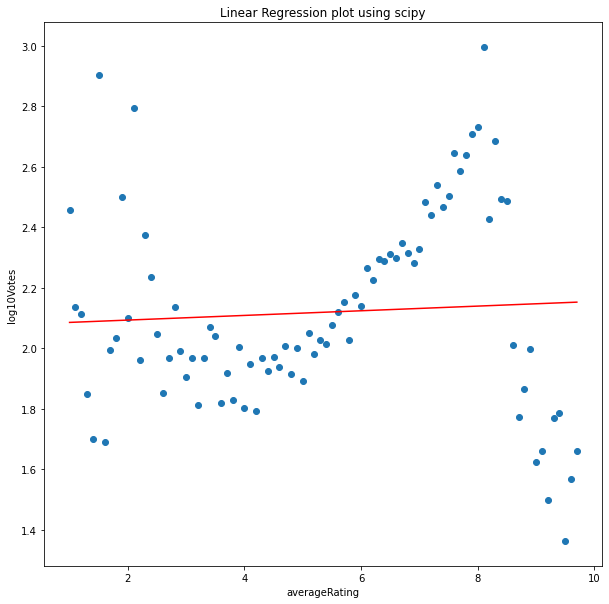

The equation of the linear regression line using scipy is:
y =  0.007691496810815307x + 2.0778175106163106


In [60]:
#     8.2 Using scipy 


from scipy import stats

x = df_new_averageRating['averageRating']
y = df_new_averageRating['log10Votes']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, mymodel, 'r')
plt.xlabel('averageRating')
plt.ylabel('log10Votes')
plt.title('Linear Regression plot using scipy')
plt.show()

print('The equation of the linear regression line using scipy is:')
print('y = ', str(slope) + 'x +', float(intercept))


Parameter containing:
tensor([[-0.0677]], requires_grad=True) Parameter containing:
tensor([0.3914], requires_grad=True)


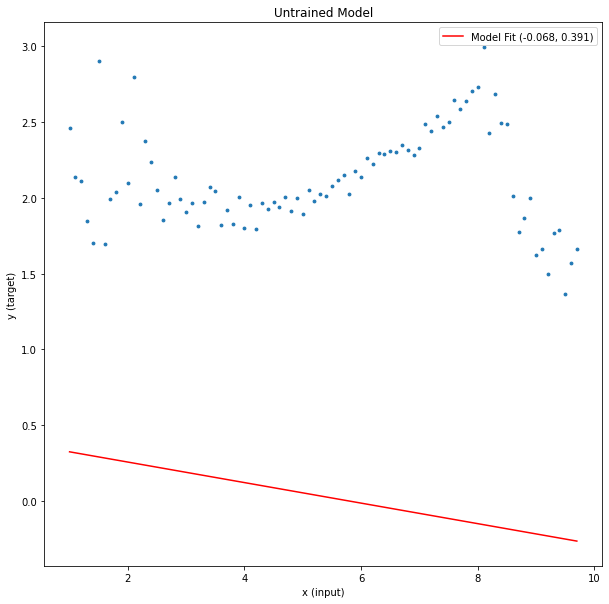

@epoch :  0  #Loss :  4.508918762207031
@epoch :  1  #Loss :  0.9052457213401794
@epoch :  2  #Loss :  0.6152440905570984
@epoch :  3  #Loss :  0.5889604091644287
@epoch :  4  #Loss :  0.5836858153343201
@epoch :  5  #Loss :  0.5801057815551758
@epoch :  6  #Loss :  0.5766833424568176
@epoch :  7  #Loss :  0.5732960104942322
@epoch :  8  #Loss :  0.5699338912963867
@epoch :  9  #Loss :  0.5665959119796753
@epoch :  10  #Loss :  0.563281774520874
@epoch :  11  #Loss :  0.5599915385246277
@epoch :  12  #Loss :  0.5567249059677124
@epoch :  13  #Loss :  0.5534816980361938
@epoch :  14  #Loss :  0.5502618551254272
@epoch :  15  #Loss :  0.547065019607544
@epoch :  16  #Loss :  0.543891191482544
@epoch :  17  #Loss :  0.5407400727272034
@epoch :  18  #Loss :  0.5376116037368774
@epoch :  19  #Loss :  0.5345056056976318
@epoch :  20  #Loss :  0.531421959400177
@epoch :  21  #Loss :  0.5283603072166443
@epoch :  22  #Loss :  0.5253207683563232
@epoch :  23  #Loss :  0.5223029255867004
@epoch 

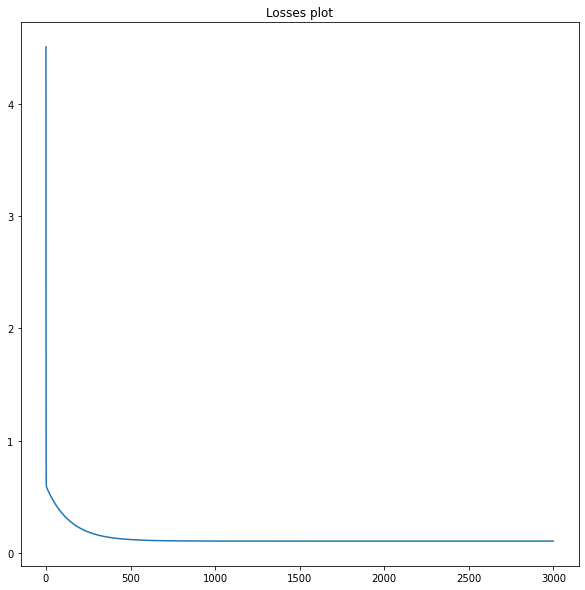

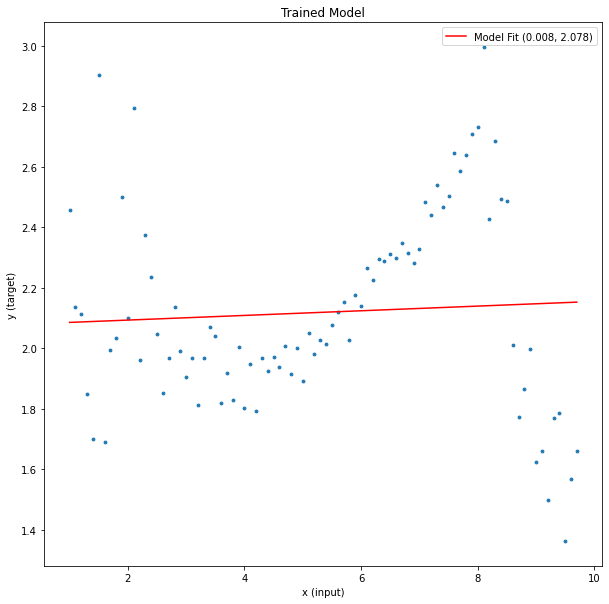

The equation of the linear regression line using pytorch (after training) is:
y =  0.007696419022977352x + 2.0777852535247803


In [61]:
#     8.3 Using pytorch 

import torch as th
import torch.nn as nn
from torch.autograd import Variable
 
x_train = th.tensor(np.array(df_new_averageRating['averageRating']).reshape(-1, 1).astype('float32'))
y_train = th.tensor(np.array(df_new_averageRating['log10Votes']).reshape(-1, 1).astype('float32'))

#x_train = np.array(df_new_averageRating['averageRating']).reshape(-1, 1).astype('float32')
#y_train = np.array(df_new_averageRating['log10Votes']).reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
   def __init__(self, input_dim, output_dim):
      super(LinearRegressionModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)

   def forward(self, x):
      out = self.linear(x)
      return out
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
#input_dim, output_dim(1, 1)
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[w, b] = model.parameters()
print(w,b)
def get_param_values():
   return w.data[0][0], b.data[0]

def plot_model_fit(title = ""):
  plt.figure(figsize = (10,10))
  plt.scatter(x, y, s = 8)
  w1 = w.data[0][0]
  b1 = b.data[0]
  x1 = torch.tensor(np.array([x_train.min(), x_train.max()]), dtype=float)
  y1 = x1 * w1 + b1
  plt.plot(x1, y1, 'r', label = 'Model Fit ({:.3f}, {:.3f})'.format(w1, b1))
  plt.title(title)
  plt.xlabel('x (input)')
  plt.ylabel('y (target)')
  plt.legend()
  plt.show()
plot_model_fit('Untrained Model')

#Initializing the loss function as Mean Squared Error
loss_fun = nn.MSELoss()
#Initializing the optimizer as Stochastic Gradient Descent with the model parameters and  learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


# Training the model
epochs = 3000 #Losses end around epoch 2900
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = loss_fun(y_pred, y_train)
    print("@epoch : ", i, " #Loss : ", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.figure(figsize = (10,10))
plt.title('Losses plot')
plt.plot(range(epochs), losses)
plt.show()


#Visualizing the trained regressor
plot_model_fit("Trained Model")

#y=xw+b
print('The equation of the linear regression line using pytorch (after training) is:')
print('y = ', str(float(w)) + 'x +', float(b))


# Conclusion

In [62]:
#Linear Regression Results from the 3 different methods
print('Sklearn:', 'y = ', str(float(coef_)) + 'x +', float(intercept_))
print('Scipy:', 'y = ', str(slope) + 'x +', float(intercept))
print('Pytorch:', 'y = ', str(float(w)) + 'x +', float(b))


Sklearn: y =  0.007691496810815309x + 2.0778175106163106
Scipy: y =  0.007691496810815307x + 2.0778175106163106
Pytorch: y =  0.007696419022977352x + 2.0777852535247803


Question:

Ensure that you get the same result in each case (or explain why the results are different). You will need to install the corresponding packages. 

Answer:

The regression equations obtained from all three methods are the same (to the 4th decimal place)




Question:

If you wanted to build a better regression model what would you do?  

Answer:

The following may be used to improve the regression model
1. Look for and drop outliers in the data

2. Build more complex models that capture the remaining variance. Theses include: 

    a. Add interaction terms to model how two or more independent variables together impact the target variable

    b. Add polynomial terms to model the nonlinear relationship between an independent variable and the target variable

    c. Fit isotonic regression to remove any assumption of the target function form
